In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson,mannwhitneyu


# Reading the dataset

In [7]:
# Reading the input file
diabetes_ip_file=pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_ip_file.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Checking the summary stats - initially without going into specific details
summary_stats = diabetes_ip_file.describe()
summary_stats

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [15]:
# Looking into the number of missing rows across the columns
diabetes_ip_file.isnull().sum()# No missing values
diabetes_ip_file.shape#(100000,9)
diabetes_ip_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Intial exploration

In [18]:
diabetes_ip_file['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

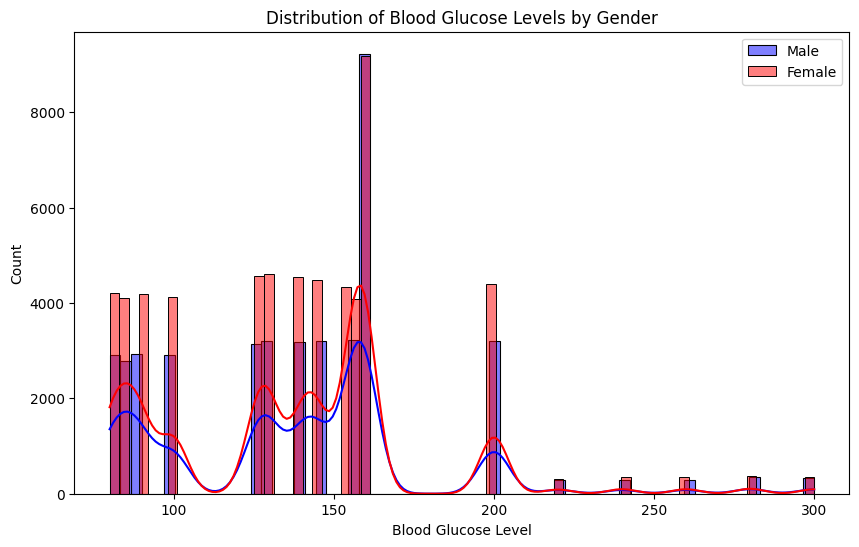

In [27]:
# Checking the distribution of Gender and its impact on blood_glucose_level
plt.figure(figsize=(10, 6))

# Plot Male distribution
sns.histplot(diabetes_ip_file[diabetes_ip_file['gender'] == 'Male']['blood_glucose_level'], 
             kde=True, label='Male', color='blue', alpha=0.5)

# Plot Female distribution
sns.histplot(diabetes_ip_file[diabetes_ip_file['gender'] == 'Female']['blood_glucose_level'], 
             kde=True, label='Female', color='red', alpha=0.5)

# Labels and title
plt.xlabel('Blood Glucose Level')
plt.ylabel('Count')
plt.title('Distribution of Blood Glucose Levels by Gender')
plt.legend()
plt.show()


In [37]:

# Segregating the Male and Female data
diabetes_men=diabetes_ip_file.loc[diabetes_ip_file['gender']=='Male']['blood_glucose_level']
diabetes_women=diabetes_ip_file.loc[diabetes_ip_file['gender']=='Female']['blood_glucose_level']
print("Shape of Men's blood glucose levels:", diabetes_men.shape)
print("Shape of Women's blood glucose levels:", diabetes_women.shape)

alpha = 0.05

stat_men_ks, p_men_ks = kstest(diabetes_men, 'norm', args=(diabetes_men.mean(), diabetes_men.std()))
print("Men's KS Test: Statistic =", stat_men_ks, ", p-value =", p_men_ks)
if p_men_ks > alpha:
    print("Men's blood glucose level: Distribution looks Gaussian (fail to reject H0)")
else:
    print("Men's blood glucose level: Distribution does not look Gaussian (reject H0)")


stat_women_ks, p_women_ks = kstest(diabetes_women, 'norm', args=(diabetes_women.mean(), diabetes_women.std()))
print("Women's KS Test: Statistic =", stat_women_ks, ", p-value =", p_women_ks)

if p_women_ks > alpha:
    print("Women's blood glucose level: Distribution looks Gaussian (fail to reject H0)")
else:
    print("Women's blood glucose level: Distribution does not look Gaussian (reject H0)")

# Shapiro-Wilk Test (for comparison)
stat_men_shapiro, p_men_shapiro = shapiro(diabetes_men.sample(5000)) #Shapiro test has limitations on sample size.
print("Men's Shapiro Test: Statistic =", stat_men_shapiro, ", p-value =", p_men_shapiro)

stat_women_shapiro, p_women_shapiro = shapiro(diabetes_women.sample(5000)) #Shapiro test has limitations on sample size.
print("Women's Shapiro Test: Statistic =", stat_women_shapiro, ", p-value =", p_women_shapiro)



# Based on KS and Shapiro results, we will assume non-normal distribution.
stat_mann, p_mann = mannwhitneyu(diabetes_men, diabetes_women)
print("Mann-Whitney U Test: Statistic =", stat_mann, ", p-value =", p_mann)

if p_mann < alpha:
    print("There is a significant difference in blood glucose levels between men and women.")
else:
    print("There is no significant difference in blood glucose levels between men and women.")

#If the data was normally distributed, you would use this instead.
#stat_ttest, p_ttest = ttest_ind(df_men, df_women)
#print("T-test: Statistic =", stat_ttest, ", p-value =", p_ttest)

Shape of Men's blood glucose levels: (41430,)
Shape of Women's blood glucose levels: (58552,)
Men's KS Test: Statistic = 0.19112287738142408 , p-value = 0.0
Men's blood glucose level: Distribution does not look Gaussian (reject H0)
Women's KS Test: Statistic = 0.18240492795328966 , p-value = 0.0
Women's blood glucose level: Distribution does not look Gaussian (reject H0)
Men's Shapiro Test: Statistic = 0.9046507477760315 , p-value = 0.0
Women's Shapiro Test: Statistic = 0.9088565707206726 , p-value = 0.0
Mann-Whitney U Test: Statistic = 1229227129.0 , p-value = 0.0002721411980328881
There is a significant difference in blood glucose levels between men and women.


Mann-Whitney U Test Results:
U Statistic: 1229227129.0
p-value: 0.00013607059901644405
Men have significantly higher blood glucose levels than women.
Mean blood glucose level for men: 138.89
Mean blood glucose level for women: 137.47


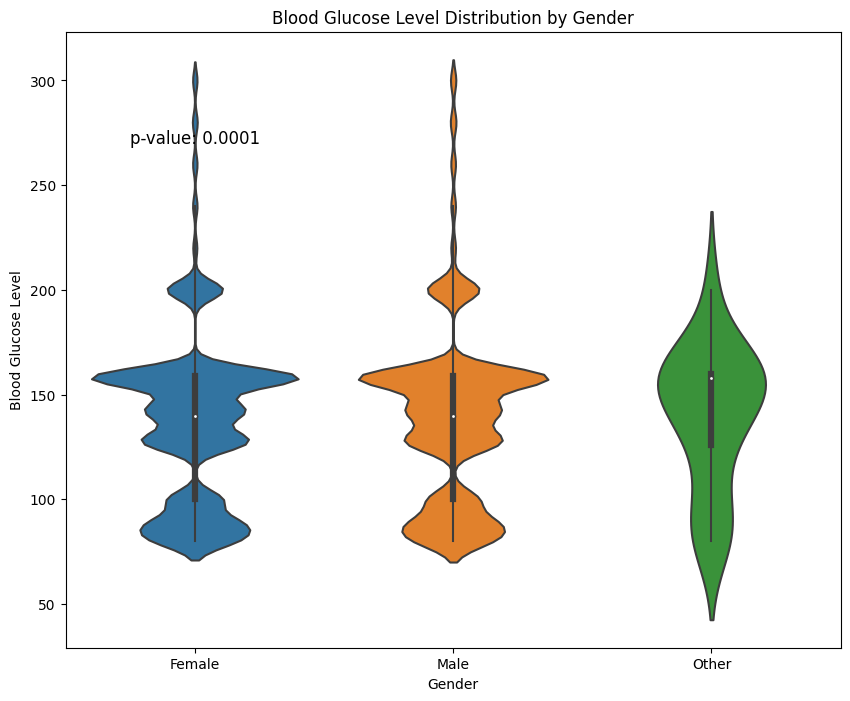

In [ ]:
# Both the male and female blood glucose levels are not normally distributed, and there is a significant difference between the two groups.
stat, p = mannwhitneyu(diabetes_men, diabetes_women, alternative='greater') #greater to test if men > women

# Print the results
print("Mann-Whitney U Test Results:")
print("U Statistic:", stat)
print("p-value:", p)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Men have significantly higher blood glucose levels than women.")
else:
    print("There is no significant difference, or women have higher blood glucose levels.")

# Calculate the mean blood glucose levels for men and women
mean_men = diabetes_men.mean()
mean_women = diabetes_women.mean()

print(f"Mean blood glucose level for men: {mean_men:.2f}")
print(f"Mean blood glucose level for women: {mean_women:.2f}")


plt.figure(figsize=(10, 8))
sns.violinplot(x='gender', y='blood_glucose_level', data=diabetes_ip_file)

# Add the p-value to the plot
plt.text(0, diabetes_ip_file['blood_glucose_level'].max() * 0.9, f"p-value: {p:.4f}", ha='center', fontsize=12)

# Set plot title and labels
plt.title("Blood Glucose Level Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Blood Glucose Level")

# Show the plot
plt.show()

## Summary stats block
### 1. % of people getting diabetes at different age groups
### 2. split the above into gender
### 3. bin the above into age groups and plot them
### 4. % of patients who smoke and have diabetes
### 5. % of non smokers and have diabetes
### 6. correlation between diabetes and smoking and diabetes and hypertension
### 7. correlation between all the different parameters
